<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Machine_Learning_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gc
import random
import matplotlib.image as mpimg
from numpy import expand_dims
from itertools import chain
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input
from skimage.transform import resize
from IPython.display import SVG
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
#from tensorflow.keras.utils.plot_model import plot_model
import tensorflow as tf

**Loading Data**

In [3]:
data_dir = '/content/drive/MyDrive/Project_ML/Images/'
img_width, img_height = 224, 224 
channels = 3
batch_size = 64
num_images= 50
image_arr_size= img_width * img_height * channels

In [4]:
def get_images(image_dir):

    image_index = 0
    image_arr_size= img_width * img_height * channels
    images = np.ndarray(shape=(num_images, image_arr_size))
    labels = np.array([])                       

    for type in os.listdir(image_dir)[:50]:
        type_images = os.listdir(image_dir + type)
        labels= np.append(labels, type.split('-')[1])
        
        for image in type_images[:1]:
            image_file = os.path.join(image_dir, type + '/', image)
            image_data = mpimg.imread(image_file)
            image_resized = resize(image_data, (img_width, img_height), anti_aliasing=True)
            images[image_index, :] = image_resized.flatten()
            print (type, ':', image)
            image_index += 1

    return (images, labels)

def plot_images(instances, images_per_row=10, **options):
    size = img_width
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(img_width, img_height, channels) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((img_width, img_height * n_empty)))
    for row in range(n_rows):
        if (row == len(instances)/images_per_row):
            break
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.figure(figsize=(20,20))
    plt.imshow(image, **options)
    plt.axis("off")
    plt.savefig('dogs_images.png', transparent= True, bbox_inches= 'tight', dpi= 900)
    plt.show()

n02096294-Australian_terrier : n02096294_6592.jpg
n02107312-miniature_pinscher : n02107312_1724.jpg
n02100735-English_setter : n02100735_6132.jpg
n02099601-golden_retriever : n02099601_176.jpg
n02111500-Great_Pyrenees : n02111500_4097.jpg
n02100236-German_short-haired_pointer : n02100236_2854.jpg
n02097047-miniature_schnauzer : n02097047_2233.jpg
n02091244-Ibizan_hound : n02091244_156.jpg
n02113712-miniature_poodle : n02113712_777.jpg
n02094258-Norwich_terrier : n02094258_3153.jpg
n02113624-toy_poodle : n02113624_6587.jpg
n02110627-affenpinscher : n02110627_8099.jpg
n02096051-Airedale : n02096051_319.jpg
n02102973-Irish_water_spaniel : n02102973_1905.jpg
n02108422-bull_mastiff : n02108422_1445.jpg
n02098413-Lhasa : n02098413_3899.jpg
n02099849-Chesapeake_Bay_retriever : n02099849_3616.jpg
n02108000-EntleBucher : n02108000_3205.jpg
n02105056-groenendael : n02105056_5365.jpg
n02107908-Appenzeller : n02107908_7553.jpg
n02097474-Tibetan_terrier : n02097474_7132.jpg
n02101388-Brittany_spani

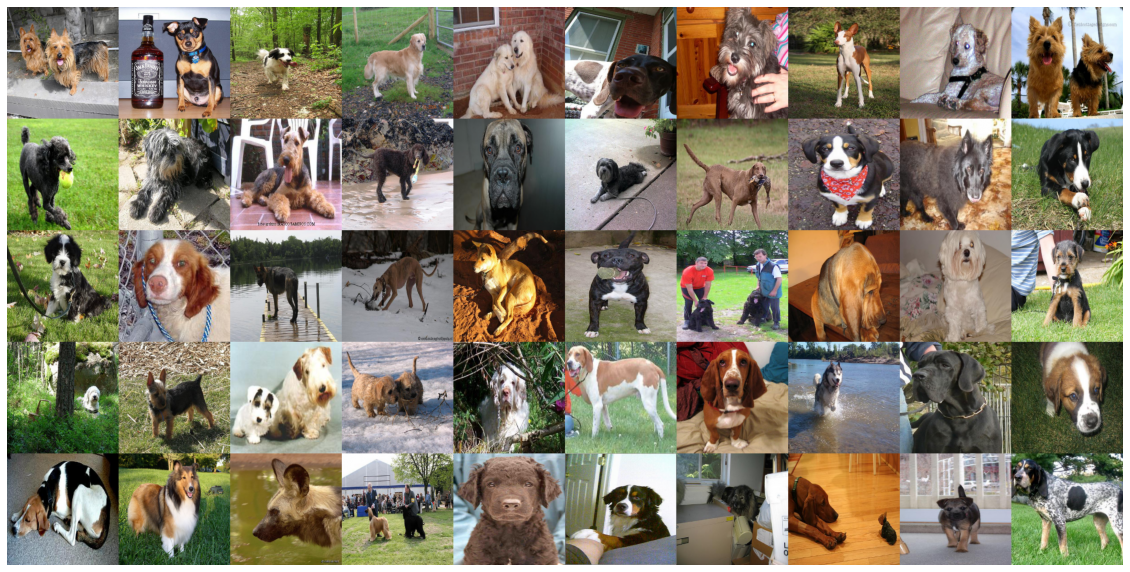

In [5]:
images, labels = get_images(data_dir)
plot_images(images)

**Count the number of classes (dogs breeds)**

In [6]:
breed_list = os.listdir(data_dir)
print("Number of Dog Breeds in Dataset:", (len(breed_list)))

Number of Dog Breeds in Dataset: 120


**Create a data frame of the number of images per breed**

In [7]:
mn = 20
d = pd.DataFrame()
folders = ([name for name in os.listdir(data_dir)
            if os.path.isdir(os.path.join(data_dir, name)) and name.startswith("")]) # get all directories 
for folder in folders:
  contents = os.listdir(os.path.join(data_dir,folder)) # get list of contents
  folder1 =folder.split("-",1)[1] 
  if len(contents) > mn: # if greater than the limit, print folder and number of contents
    temp = pd.DataFrame({'Dog': [folder1], 'Count': [len(contents)], })
    d = pd.concat([d, temp])
    print(folder1,len(contents))

Australian_terrier 196
miniature_pinscher 184
English_setter 161
golden_retriever 150
Great_Pyrenees 213
German_short-haired_pointer 152
miniature_schnauzer 154
Ibizan_hound 188
miniature_poodle 155
Norwich_terrier 185
toy_poodle 151
affenpinscher 150
Airedale 202
Irish_water_spaniel 150
bull_mastiff 156
Lhasa 186
Chesapeake_Bay_retriever 167
EntleBucher 202
groenendael 150
Appenzeller 151
Tibetan_terrier 206
Brittany_spaniel 152
German_shepherd 152
whippet 187
dingo 156
Staffordshire_bullterrier 155
Bouvier_des_Flandres 150
bloodhound 187
Maltese_dog 252
Lakeland_terrier 197
Old_English_sheepdog 169
silky_terrier 183
Sealyham_terrier 202
Dandie_Dinmont 180
clumber 150
English_foxhound 157
basset 175
malamute 178
Great_Dane 156
Saint_Bernard 170
Walker_hound 153
Shetland_sheepdog 157
African_hunting_dog 169
Afghan_hound 239
curly-coated_retriever 151
Bernese_mountain_dog 218
keeshond 158
redbone 148
Border_terrier 172
bluetick 171
kelpie 153
Irish_setter 155
Leonberg 210
Cardigan 155
s

**Bar Plots for Dog Breed**

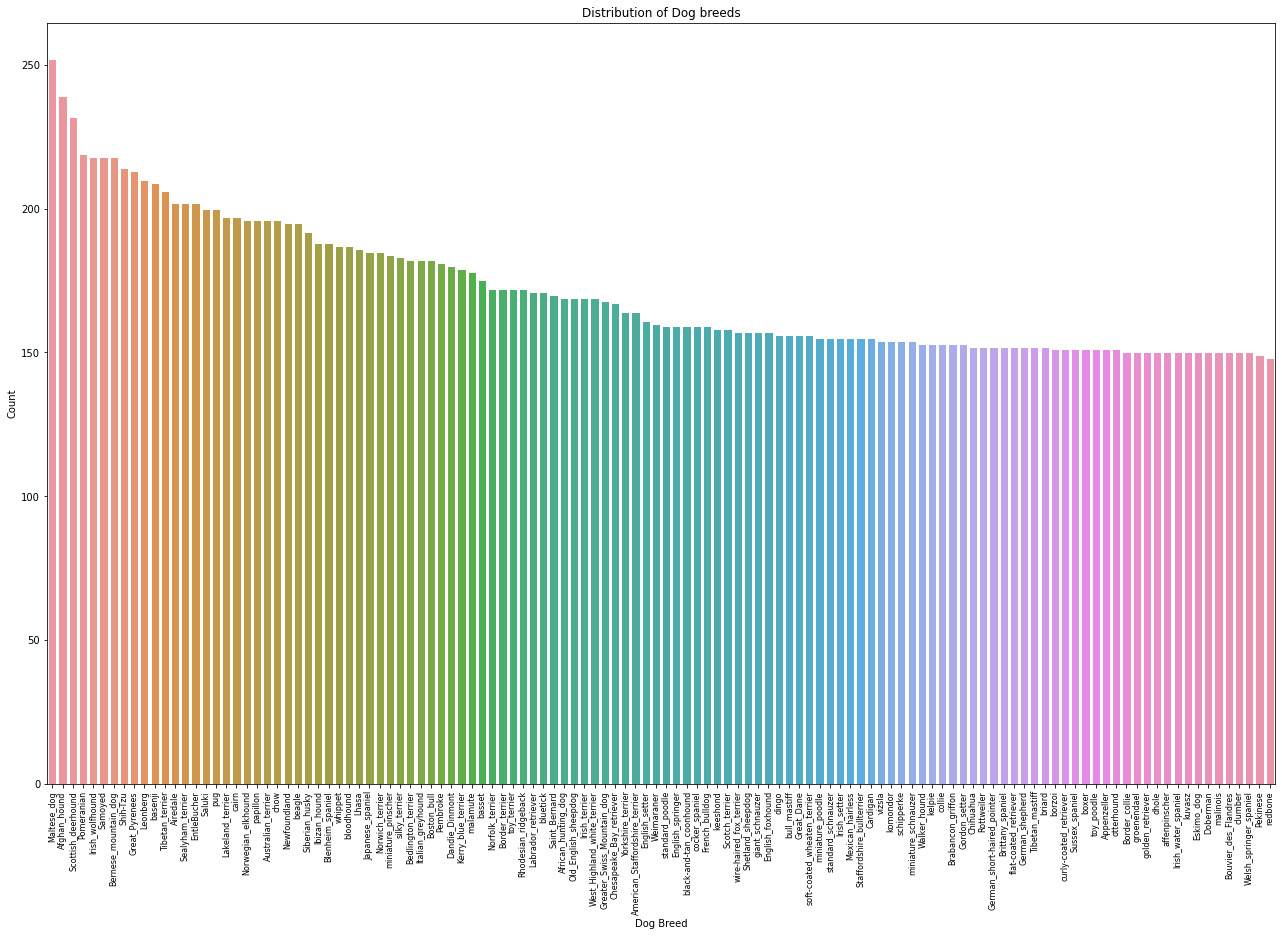

In [8]:
import seaborn as sns
## Plot a barplot for the dog breeds
fig, ax = plt.subplots()
fig.set_size_inches(22, 14)
sns.set_style("darkgrid")
d1 = d.sort_values('Count',ascending=False)
ax = sns.barplot(x = d1.Dog, y = d1.Count, data = d1)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of Dog breeds')
plt.show()

**(OR)**

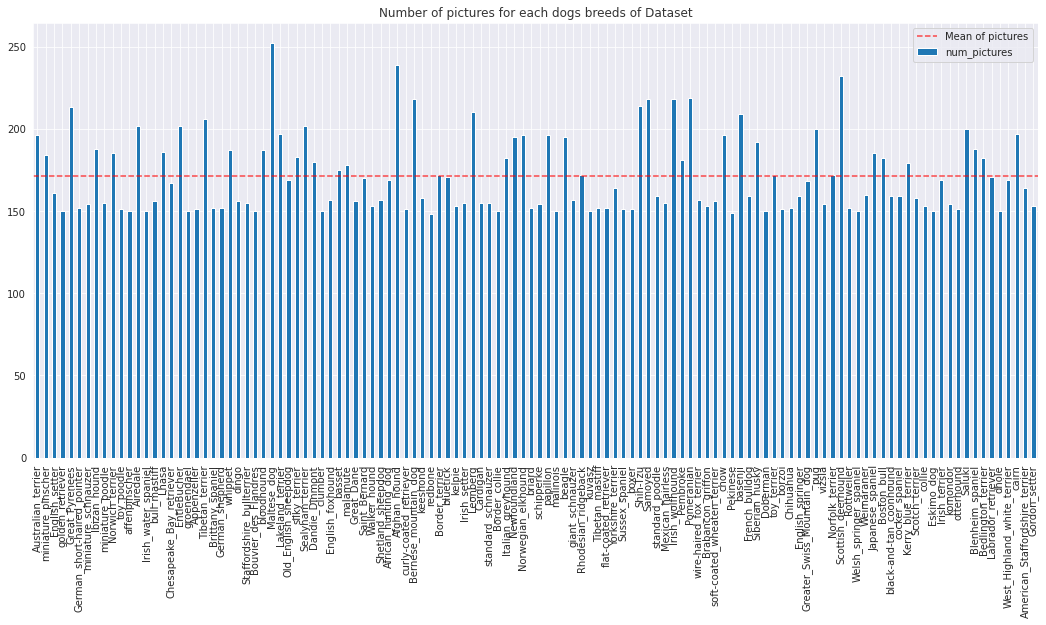

In [9]:
# Count number of pictures for each breed
df_breeds = pd.DataFrame(
    index=[breed.split('-',1)[1]
           for breed in breed_list],
    data=[len(os.listdir(data_dir + "/" + name))
          for name in breed_list],
    columns=["num_pictures"])
# Plot results
fig, ax = plt.subplots(1, 1, figsize=(18,8))
df_breeds.plot(kind="bar",
               legend=False,
               ax=ax)
ax.axhline(df_breeds["num_pictures"].mean(),
           color='r', alpha=.7,
           linestyle='--',
           label="Mean of pictures")
plt.title("Number of pictures for each "\
          "dogs breeds of Dataset",
          color="#343434", fontsize=12)
plt.legend()
plt.show()

**To see breeds with the most and least amount of pictures**

In [10]:
d1.head(5)

,Dog,Count
0,Maltese_dog,252
0,Afghan_hound,239
0,Scottish_deerhound,232
0,Pomeranian,219
0,Irish_wolfhound,218


In [11]:
d1.tail(5)

,Dog,Count
0,Bouvier_des_Flandres,150
0,clumber,150
0,Welsh_springer_spaniel,150
0,Pekinese,149
0,redbone,148


In [12]:
d1.describe()

,Count
count,120.000000
mean,171.500000
std,23.220898
min,148.000000
25%,152.750000
50%,159.500000
75%,186.250000
max,252.000000


# Data Pre-Processing and Model Implementation

In [13]:
dog_breeds = os.listdir('/content/drive/MyDrive/Project_ML/Images')
print(dog_breeds)

['n02096294-Australian_terrier', 'n02107312-miniature_pinscher', 'n02100735-English_setter', 'n02099601-golden_retriever', 'n02111500-Great_Pyrenees', 'n02100236-German_short-haired_pointer', 'n02097047-miniature_schnauzer', 'n02091244-Ibizan_hound', 'n02113712-miniature_poodle', 'n02094258-Norwich_terrier', 'n02113624-toy_poodle', 'n02110627-affenpinscher', 'n02096051-Airedale', 'n02102973-Irish_water_spaniel', 'n02108422-bull_mastiff', 'n02098413-Lhasa', 'n02099849-Chesapeake_Bay_retriever', 'n02108000-EntleBucher', 'n02105056-groenendael', 'n02107908-Appenzeller', 'n02097474-Tibetan_terrier', 'n02101388-Brittany_spaniel', 'n02106662-German_shepherd', 'n02091134-whippet', 'n02115641-dingo', 'n02093256-Staffordshire_bullterrier', 'n02106382-Bouvier_des_Flandres', 'n02088466-bloodhound', 'n02085936-Maltese_dog', 'n02095570-Lakeland_terrier', 'n02105641-Old_English_sheepdog', 'n02097658-silky_terrier', 'n02095889-Sealyham_terrier', 'n02096437-Dandie_Dinmont', 'n02101556-clumber', 'n0208

In [14]:
filtered_breeds = [breed.split('-',1)[1] for breed in dog_breeds]
filtered_breeds[:]

['Australian_terrier',
 'miniature_pinscher',
 'English_setter',
 'golden_retriever',
 'Great_Pyrenees',
 'German_short-haired_pointer',
 'miniature_schnauzer',
 'Ibizan_hound',
 'miniature_poodle',
 'Norwich_terrier',
 'toy_poodle',
 'affenpinscher',
 'Airedale',
 'Irish_water_spaniel',
 'bull_mastiff',
 'Lhasa',
 'Chesapeake_Bay_retriever',
 'EntleBucher',
 'groenendael',
 'Appenzeller',
 'Tibetan_terrier',
 'Brittany_spaniel',
 'German_shepherd',
 'whippet',
 'dingo',
 'Staffordshire_bullterrier',
 'Bouvier_des_Flandres',
 'bloodhound',
 'Maltese_dog',
 'Lakeland_terrier',
 'Old_English_sheepdog',
 'silky_terrier',
 'Sealyham_terrier',
 'Dandie_Dinmont',
 'clumber',
 'English_foxhound',
 'basset',
 'malamute',
 'Great_Dane',
 'Saint_Bernard',
 'Walker_hound',
 'Shetland_sheepdog',
 'African_hunting_dog',
 'Afghan_hound',
 'curly-coated_retriever',
 'Bernese_mountain_dog',
 'keeshond',
 'redbone',
 'Border_terrier',
 'bluetick',
 'kelpie',
 'Irish_setter',
 'Leonberg',
 'Cardigan',
 

In [15]:
X = []
y = []

fullpaths = ['/content/drive/MyDrive/Project_ML/Images/{}'.format(dog_breeds) for dog_breeds in dog_breeds]

for counter, fullpath in enumerate(fullpaths):
    for imgname in os.listdir(fullpath):
        X.append([fullpath + '/' + imgname])
        y.append(filtered_breeds[counter])

X = list(chain.from_iterable(X))

In [16]:
combined = list(zip(X, y))
random.shuffle(combined)

X[:], y[:] = zip(*combined)

In [17]:
X = X[:4000]

y = y[:4000]

In [18]:
labels = LabelEncoder()
labels.fit(y)
label_encoded = to_categorical(labels.transform(y), len(filtered_breeds))
label_encoded = np.array(label_encoded)

In [19]:
images = np.array([img_to_array(load_img(img, target_size = (299,299))) for img in X]) 
x_train, x_test, y_train, y_test = train_test_split(images, label_encoded, test_size = 0.3,stratify = np.array(y), random_state = 120) 

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.3,stratify=np.array(y_train),random_state = 120)

print('Training Dataset Size: ', x_train.shape)
print('Training Label Size: ', y_train.shape)
print('Validation Dataset Size: ', x_val.shape)
print('Validation Label Size: ', y_val.shape)
print('Testing Dataset Size: ', x_test.shape)
print('Testing Label Size: ', y_test.shape)

Training Dataset Size:  (1960, 299, 299, 3)
Training Label Size:  (1960, 120)
Validation Dataset Size:  (840, 299, 299, 3)
Validation Label Size:  (840, 120)
Testing Dataset Size:  (1200, 299, 299, 3)
Testing Label Size:  (1200, 120)


In [20]:
pre_trained_model =  InceptionV3 (weights = "imagenet", input_shape=(299,299,3), include_top= False)
for layer in pre_trained_model.layers:
    layer.trainable=False 
pre_trained_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

In [21]:
last_layer = pre_trained_model.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 2048)


In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.97):
            print("\nReached 97.0% accuracy so cancelling training!")
            
            self.model.stop_training = True

In [23]:
model = models.Sequential()
model.add(pre_trained_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten()) 
model.add(Dropout(0.3))
model.add(Dense(2048, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(len(filtered_breeds), activation = 'softmax'))
model.compile(optimizer = RMSprop(learning_rate=0.001), loss ='categorical_crossentropy', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                        

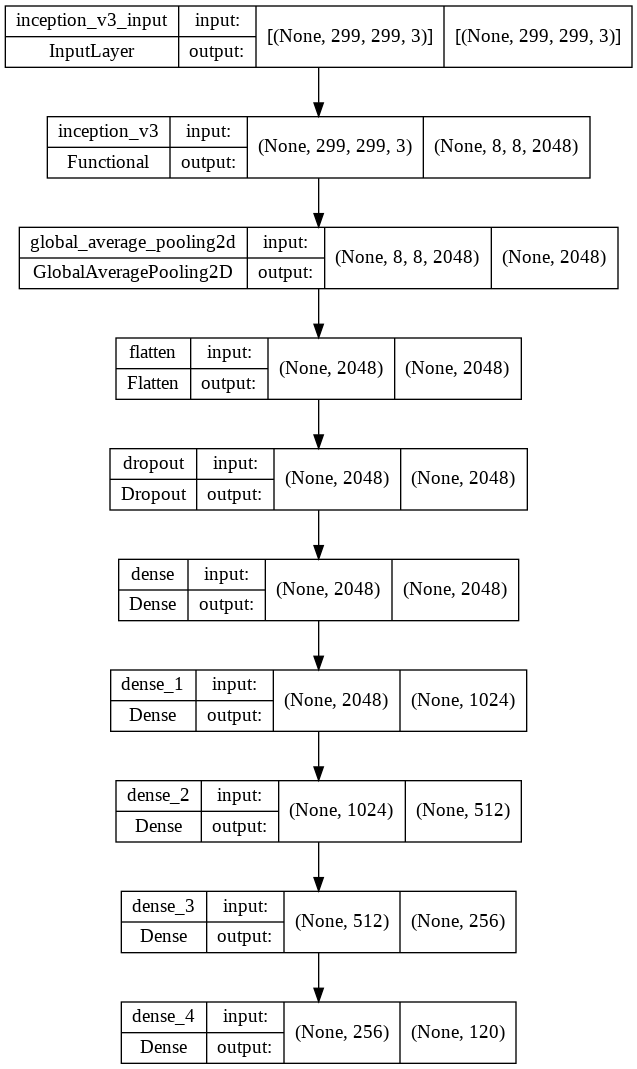

In [24]:
tf.keras.utils.plot_model(model, to_file='RMSprop.png', show_shapes=True, show_layer_names=True) 

In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
)

train_generator = train_datagen.flow(x_train,y_train,shuffle=False,batch_size=25)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = val_datagen.flow(x_val,y_val,shuffle= False,batch_size=25)

In [26]:
callbacks = myCallback()
epochs = 19
history = model.fit_generator(train_generator, epochs = epochs,validation_data = validation_generator, callbacks = [callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/15
79/79 [==============================] - 77s 749ms/step - loss: 4.7594 - accuracy: 0.0408 - val_loss: 3.6124 - val_accuracy: 0.1821
Epoch 2/15
79/79 [==============================] - 53s 672ms/step - loss: 2.8842 - accuracy: 0.2903 - val_loss: 1.6642 - val_accuracy: 0.4952
Epoch 3/15
79/79 [==============================] - 53s 670ms/step - loss: 1.7856 - accuracy: 0.4918 - val_loss: 1.0958 - val_accuracy: 0.6619
Epoch 4/15
79/79 [==============================] - 53s 669ms/step - loss: 1.3856 - accuracy: 0.5837 - val_loss: 0.8823 - val_accuracy: 0.7083
Epoch 5/15
79/79 [==============================] - 53s 671ms/step - loss: 1.2319 - accuracy: 0.6505 - val_loss: 0.7689 - val_accuracy: 0.7500
Epoch 6/15
79/79 [==============================] - 53s 673ms/step - loss: 1.1582 - accuracy: 0.6612 - val_loss: 0.7340 - val_accuracy: 0.7548
Epoch 7/15
79/79 [==============================] - 53s 669ms/step - loss: 1.0543 - accuracy: 0.7031 - val_loss: 0.7469 - val_accuracy: 0.7762

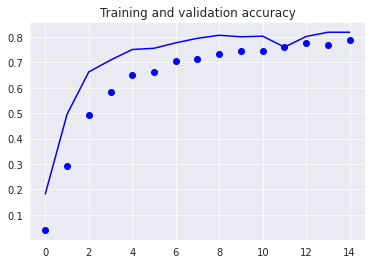

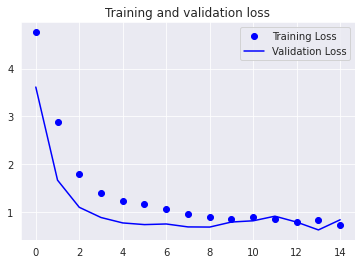

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

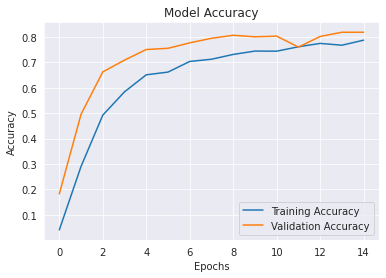

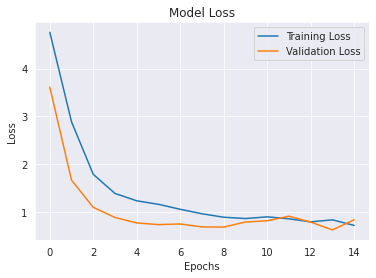

In [28]:
plt.subplot()
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('baseline_acc_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('baseline_loss_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()

In [29]:
correct = (target_labels == predictions)
accuracy = correct.sum() / correct.size
print(accuracy)

NameError: ignored